# Lending-Club loan status prediction
## Content (brief overview of different sections):
#### 1. EDA (Analyzing the data and Feature selection):
- Data Cleaning
- Preliminary statistical analysis of data
- Feature selection using Correlation analysis
- Feature selection using Mutual Information Gain<br>

#### 2. Analyzing several "Binary Classification" modeling approaches
- Models considered (Pros & Cons)
- Models used [XGboost, Random Forest]

#### 3. Building the models
- Training Random forest model
- Training XGboost model
- Hyperparameter tuning of XGboost model

#### 4. Explaining dependence of predictions on features
- Performing SHAP analysis
- Analyzed feature correlation with target variable

#### 5. Additional steps and Data enrichment
- Additional tasks to perform
- Data sets and additional feature for enrichment

In [1]:
# Importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile
%load_ext memory_profiler

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [ ]:
# Data should be present in same directory as of this notebook.
# Reading the data.
df_scan = pd.read_csv('/home/rahul/Downloads/Loan_status_2007-2020Q3.gzip', low_memory=False)  #, nrows=600000
df_scan.head()

In [3]:
df_scan = df_scan.drop(["Unnamed: 0", "url"], axis=1)
df_scan.shape

(2925493, 140)

# 1. EDA (Analyzing the data and Feature selection)

In [4]:
# Raw data type and unique no. of entries in each column.
dtype_df = pd.DataFrame(df_scan.dtypes.sort_values())
uniq_count = pd.DataFrame(df_scan.nunique()).sort_values(0)
type_count_df = pd.merge(dtype_df, uniq_count, left_index=True, right_index=True).sort_values("0_y")
type_count_df.columns = ["dtype", "unique_elem"]

,0_x,0_y
pymnt_plan,object,1
policy_code,float64,1
debt_settlement_flag,object,2
initial_list_status,object,2
term,object,2
application_type,object,2
hardship_flag,object,2
verification_status,object,3
verification_status_joint,object,3
hardship_status,object,4


In [5]:
# Remove column with single value and post charge off related variables.
df_scan = df_scan.drop(["pymnt_plan", "policy_code", "debt_settlement_flag"], axis=1)

### Analyzing data distribution for various categorical variables with less number of classes

w    73.130717
f    26.869249
Name: initial_list_status, dtype: float64


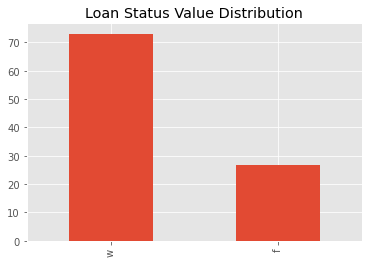

In [6]:
(df_scan["initial_list_status"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Loan Status Value Distribution')
print(df_scan["initial_list_status"].value_counts()*100/(df_scan.shape[0]))

 36 months    70.418114
 60 months    29.581852
Name: term, dtype: float64


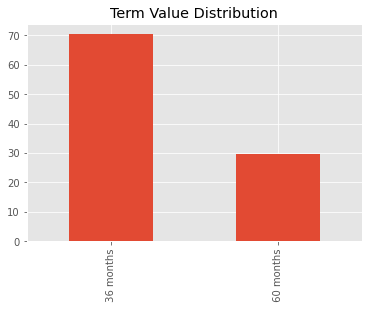

In [7]:
(df_scan["term"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Term Value Distribution')
print(df_scan["term"].value_counts()*100/(df_scan.shape[0]))

Individual    92.804153
Joint App      7.195813
Name: application_type, dtype: float64


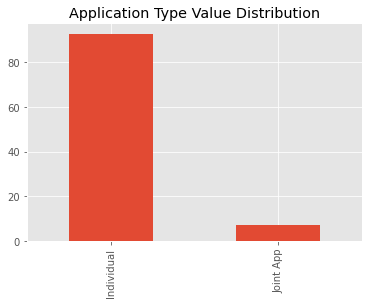

In [8]:
(df_scan["application_type"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Application Type Value Distribution')
print(df_scan["application_type"].value_counts()*100/(df_scan.shape[0]))

N    94.531417
Y     4.154753
Name: hardship_flag, dtype: float64


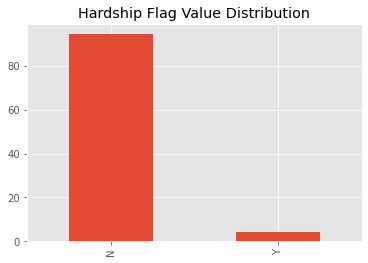

In [9]:
(df_scan["hardship_flag"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Hardship Flag Value Distribution')
print(df_scan["hardship_flag"].value_counts()*100/(df_scan.shape[0]))

Source Verified    39.078781
Not Verified       36.427604
Verified           24.493581
Name: verification_status, dtype: float64


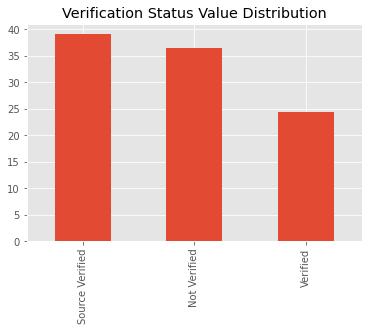

In [10]:
(df_scan["verification_status"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Verification Status Value Distribution')
print(df_scan["verification_status"].value_counts()*100/(df_scan.shape[0]))

Fully Paid                                             51.197627
Current                                                35.242470
Charged Off                                            12.392715
Late (31-120 days)                                      0.552180
In Grace Period                                         0.342780
Late (16-30 days)                                       0.092942
Issued                                                  0.070484
Does not meet the credit policy. Status:Fully Paid      0.067954
Does not meet the credit policy. Status:Charged Off     0.026013
Default                                                 0.014801
Name: loan_status, dtype: float64


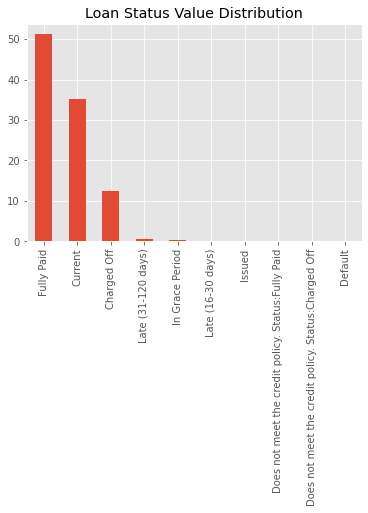

In [11]:
(df_scan["loan_status"].value_counts()*100/(df_scan.shape[0])).plot.bar()
plt.title('Loan Status Value Distribution')
print(df_scan["loan_status"].value_counts()*100/(df_scan.shape[0]))

### Removing values with "hardship_flag = Y" and "application_type = joint App" :
- These classes are highly skewed with different feature characterstics then rest of the data.
- Most hardship and joint application related columns contain NaN values when data not in "hardship_flag = Y" or "application_type = Joint App" category.

In [12]:
# Joint applicant related columns.
joint_app_rel_cols = ["application_type" ,"revol_bal_joint" ,"sec_app_fico_range_low" ,"sec_app_fico_range_high" 
                      ,"sec_app_earliest_cr_line" ,"sec_app_inq_last_6mths" ,"sec_app_mort_acc" ,"sec_app_open_acc" 
                      ,"sec_app_revol_util" ,"sec_app_open_act_il","sec_app_num_rev_accts" ,"sec_app_chargeoff_within_12_mths" 
                      ,"sec_app_collections_12_mths_ex_med" ,"dti_joint","annual_inc_joint", "verification_status_joint"]

# Hardship rate related columns.
hardship_rel_cols = ["hardship_flag","hardship_type","hardship_reason","hardship_status","deferral_term","hardship_amount"
                     ,"hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length","hardship_dpd"
                     ,"hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount"
                     ,"hardship_last_payment_amount"]

# Filtering "hardship_flag" and "application_type" to analyse nan values
df_hardship_N = df_scan.loc[df_scan["hardship_flag"]!='Y']
df_individual = df_scan.loc[df_scan["application_type"]!='Joint App']

In [13]:
# Given the above filter for "hardship_flag" calculating percentage of nan values in each column.
nan_count_hard_N = pd.DataFrame(df_hardship_N[hardship_rel_cols].isna().sum(axis=0)*100/df_hardship_N.shape[0]).T
print("filter->[hardship_flag != N]: Percentage of Nan value in hardship related columns")
nan_count_hard_N.head()

filter->[hardship_flag != N]: Percentage of Nan value in hardship related columns


,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,1.370782,99.212146,99.21211,99.212146,99.212146,97.841292,99.212146,99.212146,99.212146,99.212146,99.212182,99.213751,97.942435,97.841292,97.841292


In [14]:
# Given the above filter for "application_type" calculating percentage of nan values in each column.
nan_count_individual = pd.DataFrame(df_individual[joint_app_rel_cols].isna().sum(axis=0)*100/df_individual.shape[0]).T
print("filter->[application_type = Individual]: Percentage of Nan value in joint application related columns")
nan_count_individual.head()

filter->[application_type = Individual]: Percentage of Nan value in joint application related columns


,application_type,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,dti_joint,annual_inc_joint,verification_status_joint
0,0.000037,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [15]:
# Removing large temporary variables to free memory.
del(df_individual, df_hardship_N)

### Filtering out selective data for analysis
1. Entries with "loan_status" in "Fully Paid or "Charged Off" 
2. Entries with "application_type=Joint App" and "hardship_flag=N"
3. Removing hardship and joint application related columns
4. Relabeling "Fully Paid = 0" and "Charged Off = 1"

In [16]:
df_scan = df_scan.loc[(df_scan["loan_status"]=='Fully Paid') | (df_scan["loan_status"]=='Charged Off')]

In [17]:
df_scan = df_scan.loc[(df_scan["hardship_flag"]=='N') | (df_scan["application_type"]=='Individual')]
df_scan = df_scan.drop( joint_app_rel_cols+hardship_rel_cols, axis=1)

In [18]:
# Converting column values to binary.
df_scan["loan_status"] = df_scan["loan_status"].replace({"Fully Paid":0, "Charged Off":1})

In [19]:
df_scan.shape

(1858859, 106)

In [20]:
df_scan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,0,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,1,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,0,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN,Jun-2017,739.0,735.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,0,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,NaN,Apr-2016,604.0,600.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,0,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2

### Data Formatting
- Remove % from rates column and "month" from term.
- Convert date related columns to datetime datatype.
- Convert all alphabets to upper case.

In [21]:
# Keeping only numeric part of each value.
df_scan['term'] = df_scan['term'].astype(str).str.extract('(\d+)', expand=False).astype(float)
df_scan['int_rate'] = df_scan['int_rate'].astype(str).str.extract('(\d+)', expand=False).astype(float)
df_scan['revol_util'] = df_scan['revol_util'].astype(str).str.extract('(\d+)', expand=False).astype(float)

# Conversion to datetime format.
df_scan["issue_d"] = df_scan["issue_d"].astype('datetime64[ns]')
df_scan["earliest_cr_line"] = df_scan["earliest_cr_line"].astype('datetime64[ns]')
df_scan["last_credit_pull_d"] = df_scan["last_credit_pull_d"].astype('datetime64[ns]')
df_scan["next_pymnt_d"] = df_scan["next_pymnt_d"].astype('datetime64[ns]')
df_scan["last_pymnt_d"] = df_scan["last_pymnt_d"].astype('datetime64[ns]')

# Convert all object class to upper case.
object_cols = df_scan.dtypes[df_scan.dtypes=='object'].index
for entry in object_cols:
    df_scan[entry] = df_scan[entry].str.upper()

### Comparing basic statistics and Nan values in "Complete", "Fully Paid" and "Charge Off data"

In [22]:
# Fully paid data.
df_FP = df_scan.loc[df_scan['loan_status']==0]
# Charged off data.
df_CO = df_scan.loc[df_scan['loan_status']==1]

In [23]:
# Computing number of nan values in each category.
null_count_comp = pd.DataFrame(df_scan.isna().sum(axis=0)*100/df_scan.shape[0]).T
null_count_FP = pd.DataFrame(df_FP.isna().sum(axis=0)*100/df_FP.shape[0]).T
null_count_CO = pd.DataFrame(df_CO.isna().sum(axis=0)*100/df_CO.shape[0]).T

null_count = pd.concat([null_count_comp,null_count_FP, null_count_CO])
null_count.index = ['Complete', 'FP', 'CO']
null_count

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
Complete,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.055780,6.292247,0.0,0.0,0.0,0.0,0.0,0.0,1.151244,0.000054,0.0,0.058584,0.0,0.0,0.0,0.0,0.000054,50.799227,83.412567,0.0,0.0,0.0,0.075100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176829,0.0,100.0,0.003497,0.0,0.0,0.003013,73.876717,0.0,3.632712,3.632712,45.534599,45.534546,45.534546,45.534546,47.092329,45.534546,53.163796,45.534546,45.534546,45.534546,45.542023,3.632712,45.534546,45.534599,45.534599,2.543550,3.635133,3.641696,3.696246,0.003013,0.0,6.513888,3.632766,3.632766,3.632712,2.543550,3.572245,76.570574,12.443332,66.794254,3.632712,3.632712,3.632712,3.004047,3.632712,3.632712,3.632712,3.632766,3.632712,3.004047,7.295712,3.632712,3.632712,3.632712,3.640997,3.665367,0.037496,0.002098,3.632712,2.543550,2.543550,3.632712
FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.474656,5.765525,0.0,0.0,0.0,0.0,0.0,0.0,1.063663,0.000067,0.0,0.057931,0.0,0.0,0.0,0.0,0.000067,51.154067,83.967540,0.0,0.0,0.0,0.075303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.003675,0.0,0.0,0.003341,74.490853,0.0,3.822547,3.822547,46.355120,46.355053,46.355053,46.355053,47.806925,46.355053,53.898318,46.355053,46.355053,46.355053,46.362737,3.822547,46.355053,46.355120,46.355120,2.699082,3.824885,3.786599,3.840654,0.003341,0.0,6.616108,3.822547,3.822547,3.822547,2.699082,3.718646,76.790167,13.174687,66.990018,3.822547,3.822547,3.822547,3.178963,3.822547,3.822547,3.822547,3.822614,3.822547,3.178963,7.122316,3.822547,3.822547,3.822547,3.831367,3.810520,0.038687,0.002539,3.822547,2.699082,2.699082,3.822547
CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.456740,8.468442,0.0,0.0,0.0,0.0,0.0,0.0,1.513089,0.000000,0.0,0.061286,0.0,0.0,0.0,0.0,0.000000,49.333175,81.119648,0.0,0.0,0.0,0.074260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.907412,0.0,100.0,0.002761,0.0,0.0,0.001656,71.339364,0.0,2.848396,2.848396,42.144551,42.144551,42.144551,42.144551,44.139919,42.144551,50.129058,42.144551,42.144551,42.144551,42.151176,2.848396,42.144551,42.144551,42.144551,1.900955,2.851156,3.043019,3.099611,0.001656,0.0,6.091558,2.848672,2.848672,2.848396,1.900955,2.967378,75.663305,9.421680,65.985441,2.848396,2.848396,2.848396,2.281367,2.848396,2.848396,2.848396,2.848396,2.848396,2.281367,8.012114,2.848396,2.848396,2.848396,2.854469,3.065656,0.032575,0.000276,2.848396,1.900955,1.900955,2.848396


In [24]:
# Basic statistics of data in Fully paid and Charged off category.
description_comp = df_scan.describe().T
description_FP = df_FP.describe().T
description_CO = df_CO.describe().T
desc_df = pd.merge(description_FP, description_CO, left_index=True, right_index=True, suffixes=('_FP', '_CO'))
desc_df[["count_FP", "count_CO","mean_FP", "mean_CO", "std_FP", "std_CO", "min_FP", "min_CO", "max_FP", "max_CO"]]

,count_FP,count_CO,mean_FP,mean_CO,std_FP,std_CO,min_FP,min_CO,max_FP,max_CO
loan_amnt,1496620.0,362239.0,14266.659322,15894.051027,8910.724561,9079.769091,500.000000,9.000000e+02,4.000000e+04,4.000000e+04
funded_amnt,1496620.0,362239.0,14260.517483,15888.123173,8907.979993,9077.412928,500.000000,9.000000e+02,4.000000e+04,4.000000e+04
funded_amnt_inv,1496620.0,362239.0,14243.629788,15867.986362,8909.199476,9080.497842,0.000000,0.000000e+00,4.000000e+04,4.000000e+04
term,1496620.0,362239.0,41.160091,45.587637,9.859803,11.755037,36.000000,3.600000e+01,6.000000e+01,6.000000e+01
int_rate,1496620.0,362239.0,12.002251,15.074807,4.562805,5.014439,5.000000,5.000000e+00,3.000000e+01,3.000000e+01
installment,1496620.0,362239.0,432.272429,472.604914,265.847684,268.334772,4.930000,2.162000e+01,1.719830e+03,1.717630e+03
annual_inc,1496620.0,362239.0,78686.397419,72000.050229,89510.965326,195305.946555,0.000000,0.000000e+00,6.100000e+07,1.100000e+08
loan_status,1496620.0,362239.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00
dti,1495753.0,362017.0,18.144913,20.258494,12.670524,14.257971,-1.000000,0.000000e+00,9.990000e+02,9.990000e+02
delinq_2yrs,1496620.0,362239.0,0.306829,0.338081,0.864038,0.921245,0.000000,0.000000e+00,4.200000e+01,3.600000e+01


### Removing columns which provide no information or might cause information leak.
1. Removing columns with large amount of missing values (**Excluding those columns where Nan represents "non-occurrence" of an incident, in that case replacing Nan value with "9999" representing such event occurred long time ago, instead of removing rows or columns with these Nan values.**)
2. Removing columns with very less variance.
3. **Removing the columns which might cause information leakage** => very less overlap between variable distribution in "Fully Paid" and "Charged Off" categories  =>  [mean_FP-std_FP, mean_FP+std_FP] and [mean_CO-std_CO, mean_CO+std_CO] does not overlap

In [25]:
# Replacing nan with 9999 when column is representing time since occurrence.
occurrence_rel_cols = [col_name for col_name in list(null_count.columns) if "since" in col_name]
df_scan[occurrence_rel_cols] = df_scan[occurrence_rel_cols].fillna(9999)

In [26]:
# Removing column with lot of missing values.
null_rem_cols = [col_name for col_name in list(null_count.T[null_count.T['Complete']>40].index) if "since" not in col_name]
df_scan = df_scan.drop(null_rem_cols, axis=1)

In [27]:
# Removing columns with information leakage (refer desc_df dataframe above.)
leak_rem_cols = ["recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_fico_range_high", "last_fico_range_low"]
df_scan = df_scan.drop(leak_rem_cols, axis=1)

In [28]:
# Removing columns with very less variability in data. Dropping the columns for which 95 Percentile and 5 Percentile 
# are equal => 90% of these values are same.
quantile_diff_comp = df_scan.quantile(0.05) - df_scan.quantile(0.95)
quant_rem_cols = list(quantile_diff_comp[quantile_diff_comp==0].index)
df_scan = df_scan.drop(quant_rem_cols, axis=1)

In [29]:
# Clearing memory used for variables no longer needed.
del(df_FP, df_CO)

### Removing columns specified in the Assignment
- **grade**
- **sub_grade**
- **int_rate**
- **installment (as we can derive interest rate using this and other data provided)**

In [30]:
df_scan = df_scan.drop(["grade","sub_grade","int_rate","installment"], axis=1)

In [31]:
df_scan.shape

(1858859, 74)

In [32]:
# Removing rows with nan values for further analysis
df_clean = df_scan.dropna()
df_clean

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
42537,10149488,4800.0,4800.0,4800.0,36.0,SURGICAL TECHNICIAN,2 YEARS,MORTGAGE,39600.0,SOURCE VERIFIED,2013-12-01,0,HOME_IMPROVEMENT,FOR THE HOUSE,782XX,TX,2.49,0.0,1995-08-01,755.0,759.0,2.0,9999.0,9999.0,3.0,0.0,4136.0,16.0,8.0,W,5157.519457,5157.52,4800.00,357.52,0.00,2014-09-01,2017-01-01,9999.0,0.0,4136.0,9999.0,25700.0,0.0,1379.0,21564.0,16.1,104.0,220.0,25.0,25.0,0.0,25.0,9999.0,3.0,9999.0,0.0,2.0,2.0,3.0,4.0,1.0,3.0,7.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,25700.0,4136.0,25700.0,0.0
42538,10149342,27050.0,27050.0,27050.0,36.0,TEAM LEADERN CUSTOMER OPS & SYSTEMS,10+ YEARS,OWN,55000.0,VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,481XX,MI,22.87,0.0,1986-10-01,730.0,734.0,0.0,9999.0,9999.0,14.0,0.0,36638.0,61.0,27.0,W,31752.530000,31752.53,27050.00,4702.53,0.00,2016-07-01,2020-03-01,9999.0,0.0,114834.0,9999.0,59900.0,3.0,9570.0,16473.0,53.9,117.0,326.0,16.0,6.0,4.0,16.0,9999.0,8.0,9999.0,0.0,2.0,4.0,4.0,8.0,8.0,10.0,15.0,4.0,14.0,0.0,1.0,100.0,25.0,0.0,138554.0,70186.0,35700.0,33054.0
42539,10148122,12000.0,12000.0,12000.0,36.0,SYSTEMS ENGINEER,3 YEARS,MORTGAGE,96500.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION AND CREDIT TRANSFER,782XX,TX,12.61,0.0,2003-09-01,705.0,709.0,0.0,9999.0,9999.0,17.0,0.0,13248.0,55.0,30.0,F,13397.539998,13397.54,12000.00,1397.54,0.00,2016-06-01,2020-05-01,9999.0,0.0,200314.0,9999.0,23800.0,4.0,11783.0,2441.0,83.5,123.0,118.0,10.0,9.0,1.0,10.0,9999.0,10.0,9999.0,0.0,4.0,5.0,4.0,10.0,15.0,8.0,14.0,5.0,17.0,0.0,3.0,100.0,100.0,0.0,233004.0,46738.0,14800.0,53404.0
42540,10129477,14000.0,14000.0,14000.0,36.0,ASSISTANT DIRECTOR - HUMAN RESOURCES,4 YEARS,RENT,88000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,282XX,NC,10.02,1.0,1988-06-01,670.0,674.0,0.0,16.0,115.0,6.0,1.0,3686.0,81.0,14.0,F,16945.318783,16945.32,14000.00,2945.32,0.00,2017-01-01,2020-05-01,9999.0,0.0,17672.0,9999.0,4500.0,3.0,2945.0,480.0,87.7,111.0,103.0,24.0,13.0,0.0,38.0,16.0,9999.0,16.0,0.0,3.0,4.0,3.0,9.0,3.0,4.0,10.0,4.0,6.0,0.0,0.0,78.6,100.0,1.0,31840.0,17672.0,3900.0,27340.0
42541,10159498,12000.0,12000.0,12000.0,36.0,MANAGER INFORMATION DELIVERY,10+ YEARS,MORTGAGE,105000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,UNIVERSAL CARD,060XX,CT,14.05,0.0,1994-03-01,760.0,764.0,1.0,43.0,9999.0,12.0,0.0,13168.0,21.0,22.0,W,13263.954639,13263.95,12000.00,1263.95,0.00,2017-01-01,2020-05-01,9999.0,0.0,267646.0,9999.0,61100.0,4.0,26765.0,39432.0,25.0,146.0,237.0,20.0,3.0,4.0,20.0,9999.0,3.0,43.0,0.0,2.0,2.0,5.0,5.0,9.0,8.0,9.0,2.0,12.0,0.0,2.0,95.5,0.0,0.0,333044.0,42603.0,52600.0,42769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443

In [33]:
# Removing df_scan variable from memory as it is no longer needed.
del(df_scan)

## Feature Selection
- I designed an heuristic approach to get groups of Correlated Features.
 1. Calculated mutual correlation of all pairs of columns.
 2. Created groups of correlated features with "correlation > 0.7"
 3. Calculated the sum of correlation of each feature with other features in the group.
 4. Using correlation values and intution to get single feature from each category.
<br>   <br>
- Removing the columns which have **Mutual Information Gain < 0.0001** with the target variable ("loan_status").

### Removing highly correlated features

In [34]:
# Creating correlation metrix.
corr = df_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amnt,funded_amnt,funded_amnt_inv,term,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999999,0.999994,0.377587,0.189212,0.076185,0.030549,-0.011898,0.105707,0.105706,-0.019113,0.025776,0.082089,0.166134,-0.060014,0.314862,0.103927,0.191856,0.862280,0.862296,0.802731,0.617122,0.093894,0.065137,-0.003879,0.303946,0.018847,0.317615,-0.001083,0.224639,0.198885,0.051216,0.125637,0.180672,0.048604,0.032737,0.222151,0.028561,0.026170,-0.001617,0.024938,-0.055625,0.191186,0.148692,0.211911,0.198453,0.062504,0.161874,0.168766,0.147789,0.166620,-0.024714,-0.027782,0.093769,0.022965,-0.084739,0.327055,0.260371,0.365948,0.189158
funded_amnt,0.999999,1.000000,0.999994,0.377587,0.189212,0.076186,0.030549,-0.011898,0.105707,0.105706,-0.019113,0.025776,0.082089,0.166134,-0.060013,0.314862,0.103928,0.191856,0.862281,0.862296,0.802732,0.617123,0.093894,0.065138,-0.003879,0.303947,0.018847,0.317615,-0.001081,0.224640,0.198884,0.051216,0.125638,0.180672,0.048605,0.032737,0.222150,0.028560,0.026169,-0.001617,0.024937,-0.055625,0.191186,0.148692,0.211910,0.198452,0.062504,0.161874,0.168765,0.147790,0.166620,-0.024714,-0.027781,0.093769,0.022965,-0.084738,0.327055,0.260371,0.365947,0.189157
funded_amnt_inv,0.999994,0.999994,1.000000,0.377706,0.189225,0.076184,0.030505,-0.011924,0.105797,0.105796,-0.019138,0.025812,0.082095,0.166121,-0.060027,0.314845,0.103871,0.191844,0.862260,0.862285,0.802721,0.617082,0.093880,0.065167,-0.003879,0.303972,0.018780,0.317633,-0.001096,0.224667,0.198937,0.051161,0.125646,0.180681,0.048617,0.032736,0.222168,0.028572,0.026195,-0.001617,0.024965,-0.055644,0.191161,0.148657,0.211904,0.198427,0.062505,0.161860,0.168744,0.147755,0.166608,-0.024731,-0.027791,0.093789,0.022922,-0.084734,0.327084,0.260370,0.365977,0.189163
term,0.377587,0.377587,0.377706,1.000000,0.025947,0.174721,0.062999,-0.013458,-0.002638,-0.002638,0.014258,0.015830,0.012659,0.063138,-0.016645,0.071824,0.066820,0.094122,0.319104,0.319212,0.200329,0.503632,0.030906,0.021774,-0.001739,0.097812,0.084761,0.054406,0.037556,0.075064,0.005190,0.052074,0.064884,0.045448,0.004917,-0.016431,0.104591,0.007577,0.012021,-0.025315,0.017064,-0.019751,0.044595,0.051909,0.044887,0.052028,0.062945,0.048830,0.056802,0.052532,0.063279,-0.012869,0.016746,0.048424,0.050776,-0.005935,0.093231,0.086422,0.052650,0.069440
annual_inc,0.189212,0.189212,0.189225,0.025947,1.000000,-0.021776,-0.103661,0.022560,0.044163,0.044163,0.018900,-0.027288,0.014443,0.080507,-0.001393,0.182749,0.022954,0.105467,0.169483,0.169498,0.173850,0.077716,0.022180,-0.006823,-0.000131,0.246993,-0.023602,0.179513,0.034620,0.189776,0.104912,-0.001383,0.074382,0.099332,0.019978,-0.016063,0.134836,0.016683,-0.018840,-0.021926,-0.019998,0.007268,0.070866,0.050415,0.082071,0.084595,0.057031,0.052686,0.066841,0.049681,0.080347,0.002742,0.031096,-0.001374,-0.008706,-0.025809,0.257949,0.195289,0.175786,0.163915
loan_status,0.076185,0.076186,0.076184,0.174721,-0.021776,1.000000,0.080272,0.014318,-0.124135,-0.124134,0.067342,-0.016341,-0.030654,0.027824,0.024507,-0.022395,0.051223,-0.010821,-0.289096,-0.289083,-0.420705,0.062798,0.131119,-0.029369,-0.000219,-0.

In [35]:
# Selecting variables with correlation value >0.7
correlation_columns = list(corr.columns)
correlated_col_list = []
correlated_val_list = []
for i in range(len(correlation_columns)):
    for j in range(i):
        corr_value = corr.values[i][j]
        if abs(corr_value)>0.7 and i!=j:
            print(correlation_columns[i],',',correlation_columns[j],'=',corr_value)
            correlated_col_list.append([correlation_columns[i], correlation_columns[j]])
            correlated_val_list.append(corr_value)
        

funded_amnt , loan_amnt = 0.9999992953253608
funded_amnt_inv , loan_amnt = 0.9999935699534349
funded_amnt_inv , funded_amnt = 0.9999942761259663
fico_range_high , fico_range_low = 0.9999999359490546
pub_rec , mths_since_last_record = -0.7878605462763213
total_acc , open_acc = 0.7055781110055331
total_pymnt , loan_amnt = 0.8622801202625772
total_pymnt , funded_amnt = 0.8622805340063415
total_pymnt , funded_amnt_inv = 0.8622595326489753
total_pymnt_inv , loan_amnt = 0.8622958571475117
total_pymnt_inv , funded_amnt = 0.8622962724616976
total_pymnt_inv , funded_amnt_inv = 0.8622852803562583
total_pymnt_inv , total_pymnt = 0.9999952974381738
total_rec_prncp , loan_amnt = 0.8027314521778437
total_rec_prncp , funded_amnt = 0.8027317609721057
total_rec_prncp , funded_amnt_inv = 0.8027205430245973
total_rec_prncp , total_pymnt = 0.9643162453365489
total_rec_prncp , total_pymnt_inv = 0.9643203869446098
total_rec_int , total_pymnt = 0.7126641357026041
total_rec_int , total_pymnt_inv = 0.712633014

In [36]:
# Creating a dictionary with each key representing a group of correlated features.
corr_dict = {}
init_key = 0
for pair in correlated_col_list:
    already_present = 0
    for key in corr_dict.keys():
        if pair[0] in corr_dict[key] or pair[1] in corr_dict[key]:
            corr_dict[key] = list(set(corr_dict[key]+pair))
            already_present = 1
    if already_present==0:
        corr_dict[init_key] = pair
        init_key = init_key + 1

corr_dict

{0: ['total_rec_prncp',
  'total_rec_int',
  'total_pymnt_inv',
  'total_pymnt',
  'loan_amnt',
  'funded_amnt_inv',
  'funded_amnt'],
 1: ['fico_range_high', 'fico_range_low'],
 2: ['mths_since_last_record', 'pub_rec', 'pub_rec_bankruptcies'],
 3: ['num_rev_tl_bal_gt_0',
  'num_bc_tl',
  'num_bc_sats',
  'num_sats',
  'open_acc',
  'num_rev_accts',
  'num_actv_rev_tl',
  'num_op_rev_tl',
  'total_acc'],
 4: ['total_rev_hi_lim', 'total_bc_limit', 'revol_bal', 'bc_open_to_buy'],
 5: ['avg_cur_bal', 'tot_cur_bal', 'tot_hi_cred_lim'],
 6: ['bc_util', 'revol_util', 'percent_bc_gt_75'],
 7: ['mths_since_last_delinq',
  'mths_since_recent_bc_dlq',
  'mths_since_recent_revol_delinq'],
 8: ['num_rev_tl_bal_gt_0',
  'num_bc_tl',
  'num_bc_sats',
  'num_sats',
  'num_rev_accts',
  'num_actv_rev_tl',
  'num_actv_bc_tl',
  'num_op_rev_tl'],
 9: ['num_tl_op_past_12m', 'acc_open_past_24mths'],
 10: ['total_il_high_credit_limit', 'total_bal_ex_mort']}

In [37]:
add = 0
for i in corr_dict:
    add=add+len(corr_dict[i])
print("Going from {num_corr} to {final_cols_num} columns".format(num_corr=add, final_cols_num=len(corr_dict)))

Going from 46 to 11 columns


In [38]:
# Calculating total correlation for each feature.
corr_value_dict = {}

for key in corr_dict:
    corr_col_list = []
    for col in corr_dict[key]:
        col_corr = corr[col].T[corr_dict[key]].abs().sum()
        corr_col_list.append((col, col_corr))
    corr_value_dict[key] = corr_col_list

corr_value_dict

{0: [('total_rec_prncp', 5.856024421895793),
  ('total_rec_int', 4.79582799084032),
  ('total_pymnt_inv', 6.2638261092896155),
  ('total_pymnt', 6.263795865395221),
  ('loan_amnt', 6.144422543783196),
  ('funded_amnt_inv', 6.14433508749964),
  ('funded_amnt', 6.144424811340859)],
 1: [('fico_range_high', 1.9999999359490546),
  ('fico_range_low', 1.9999999359490546)],
 2: [('mths_since_last_record', 2.58352225146714),
  ('pub_rec', 2.4344254145878272),
  ('pub_rec_bankruptcies', 2.442226573502325)],
 3: [('num_rev_tl_bal_gt_0', 6.204916102376798),
  ('num_bc_tl', 5.850219090096937),
  ('num_bc_sats', 6.051275772655977),
  ('num_sats', 6.639197923171291),
  ('open_acc', 6.658843607465896),
  ('num_rev_accts', 6.432761681362554),
  ('num_actv_rev_tl', 6.217467522846645),
  ('num_op_rev_tl', 6.984831184941817),
  ('total_acc', 5.577605648204899)],
 4: [('total_rev_hi_lim', 3.1432326160867152),
  ('total_bc_limit', 3.057128380332394),
  ('revol_bal', 2.439968138134125),
  ('bc_open_to_buy',

#### Creating new feature and keeping only one feature in each group.
- group 1: take average of 'fico_range_high', 'fico_range_high' => **"fico_avg"**
- group 4: take sum of 'total_bc_limit', 'total_rev_hi_lim' => **"total_bc_revol_limit"**
- group 6: take sum of 'bc_util', 'revol_util' => **"total_bc_revol_util"**
- group 8: take sum of 'num_bc_sats', 'num_op_rev_tl' => **"total_num_bc_revol"**
- Keeping the following columns:<br> ["total_pymnt","loan_amnt","pub_rec_bankruptcies","open_acc","tot_cur_bal","mths_since_last_delinq","acc_open_past_24mths","total_bal_ex_mort"]

In [39]:
# 8: take sum of 'num_bc_sats', 'num_op_rev_tl'
df_clean["total_num_bc_revol"] = df_clean['num_bc_sats'] + df_clean['num_op_rev_tl']
# 6: take sum of 'bc_util', 'revol_util'
df_clean["total_bc_revol_util"] = df_clean['bc_util'] + df_clean['revol_util']
# 4: take sum of 'total_bc_limit', 'total_rev_hi_lim'
df_clean["total_bc_revol_limit"] = df_clean['total_bc_limit'] + df_clean['total_rev_hi_lim']
# 1: take average of 'fico_range_high', 'fico_range_high'
df_clean["fico_avg"] = (df_clean['fico_range_high'] + df_clean['fico_range_high'])/2

# "total_pymnt" and "loan_amnt" both selected as we have some additional information in "total_pymnt" like persons ability to pay back, remaining amount to pay etc.
cols_to_keep = ["total_pymnt" ,"loan_amnt","pub_rec_bankruptcies","open_acc","tot_cur_bal","mths_since_last_delinq","acc_open_past_24mths","total_bal_ex_mort"]
corr_col_list = []
for i in corr_dict:
    corr_col_list = corr_col_list + corr_dict[i]
cols_to_remove = list(set(corr_col_list)-set(cols_to_keep))
df_clean = df_clean.drop(cols_to_remove, axis=1)


In [40]:
df_clean.head()

,id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,initial_list_status,total_pymnt,total_rec_late_fee,last_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bal_ex_mort,total_num_bc_revol,total_bc_revol_util,total_bc_revol_limit,fico_avg
42537,10149488,4800.0,36.0,SURGICAL TECHNICIAN,2 YEARS,MORTGAGE,39600.0,SOURCE VERIFIED,2013-12-01,0,HOME_IMPROVEMENT,FOR THE HOUSE,782XX,TX,2.49,0.0,1995-08-01,2.0,9999.0,3.0,W,5157.519457,0.0,2014-09-01,2017-01-01,9999.0,0.0,4136.0,9999.0,0.0,104.0,220.0,25.0,25.0,0.0,25.0,3.0,0.0,1.0,0.0,100.0,0.0,4136.0,6.0,32.1,51400.0,759.0
42538,10149342,27050.0,36.0,TEAM LEADERN CUSTOMER OPS & SYSTEMS,10+ YEARS,OWN,55000.0,VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,481XX,MI,22.87,0.0,1986-10-01,0.0,9999.0,14.0,W,31752.530000,0.0,2016-07-01,2020-03-01,9999.0,0.0,114834.0,9999.0,3.0,117.0,326.0,16.0,6.0,4.0,16.0,8.0,0.0,8.0,0.0,100.0,0.0,70186.0,14.0,114.9,95600.0,734.0
42539,10148122,12000.0,36.0,SYSTEMS ENGINEER,3 YEARS,MORTGAGE,96500.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION AND CREDIT TRANSFER,782XX,TX,12.61,0.0,2003-09-01,0.0,9999.0,17.0,F,13397.539998,0.0,2016-06-01,2020-05-01,9999.0,0.0,200314.0,9999.0,4.0,123.0,118.0,10.0,9.0,1.0,10.0,10.0,0.0,15.0,0.0,100.0,0.0,46738.0,12.0,138.5,38600.0,709.0
42540,10129477,14000.0,36.0,ASSISTANT DIRECTOR - HUMAN RESOURCES,4 YEARS,RENT,88000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,282XX,NC,10.02,1.0,1988-06-01,0.0,16.0,6.0,F,16945.318783,0.0,2017-01-01,2020-05-01,9999.0,0.0,17672.0,9999.0,3.0,111.0,103.0,24.0,13.0,0.0,38.0,9999.0,0.0,3.0,0.0,78.6,1.0,17672.0,7.0,168.7,8400.0,674.0
42541,10159498,12000.0,36.0,MANAGER INFORMATION DELIVERY,10+ YEARS,MORTGAGE,105000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,UNIVERSAL CARD,060XX,CT,14.05,0.0,1994-03-01,1.0,43.0,12.0,W,13263.954639,0.0,2017-01-01,2020-05-01,9999.0,0.0,267646.0,9999.0,4.0,146.0,237.0,20.0,3.0,4.0,20.0,3.0,0.0,9.0,0.0,95.5,0.0,42603.0,13.0,46.0,113700.0,764.0


### Removing columns with very less Mutual Information Gain with target variable

In [46]:
from sklearn.feature_selection import mutual_info_classif as MIC

df_mic = df_clean.copy()
# Removing datetime columns for mutual information calculation.
df_mic = df_mic.drop(["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"],axis=1)

cat_cols = list(df_mic.dtypes[df_clean.dtypes=="object"].index)
# Convert categorical data to integer codes
for col in cat_cols:
    df_mic[col] = df_mic[col].astype('category').cat.codes

# Shuffeling the database.
df_mic = df_mic.sample(frac=1, random_state=42).reset_index(drop=True)

X_mic = df_mic.drop(["loan_status"], axis=1)
y_mic = df_mic["loan_status"]

mi_score = MIC(X_mic[1:100000], y_mic[1:100000], random_state=42)
mi_cols = X_mic.columns
mi_df = pd.DataFrame({'Column_name':mi_cols, 'mi_val':mi_score})

mi_df = mi_df.sort_values("mi_val",ascending=False).reset_index().drop(["index"], axis=1)
cols_to_rem = list(mi_df.loc[mi_df["mi_val"]<0.0006]['Column_name'])

In [47]:
# Mutual information gain for each column. 
mi_df

,Column_name,mi_val
0,total_pymnt,0.067781
1,term,0.025513
2,total_rec_late_fee,0.021659
3,mths_since_last_major_derog,0.014682
4,fico_avg,0.010242
5,mths_since_last_delinq,0.010198
6,home_ownership,0.009885
7,verification_status,0.009374
8,initial_list_status,0.009195
9,mths_since_rcnt_il,0.008078


In [48]:
# columns to remove
cols_to_rem

['num_accts_ever_120_pd',
 'emp_length',
 'num_tl_90g_dpd_24m',
 'delinq_2yrs',
 'total_bal_ex_mort']

In [49]:
# Dropping columns with low mutual information gain.
df_clean = df_clean.drop(cols_to_rem, axis=1)

In [50]:
# Removing unwanted variables from memory.
del(mi_score, mi_df, df_mic, X_mic, y_mic)

In [51]:
df_clean

,id,loan_amnt,term,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,initial_list_status,total_pymnt,total_rec_late_fee,last_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_il_tl,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_num_bc_revol,total_bc_revol_util,total_bc_revol_limit,fico_avg
42537,10149488,4800.0,36.0,SURGICAL TECHNICIAN,MORTGAGE,39600.0,SOURCE VERIFIED,2013-12-01,0,HOME_IMPROVEMENT,FOR THE HOUSE,782XX,TX,2.49,1995-08-01,2.0,9999.0,3.0,W,5157.519457,0.00,2014-09-01,2017-01-01,9999.0,0.0,4136.0,9999.0,0.0,104.0,220.0,25.0,25.0,0.0,25.0,3.0,1.0,100.0,0.0,6.0,32.1,51400.0,759.0
42538,10149342,27050.0,36.0,TEAM LEADERN CUSTOMER OPS & SYSTEMS,OWN,55000.0,VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,481XX,MI,22.87,1986-10-01,0.0,9999.0,14.0,W,31752.530000,0.00,2016-07-01,2020-03-01,9999.0,0.0,114834.0,9999.0,3.0,117.0,326.0,16.0,6.0,4.0,16.0,8.0,8.0,100.0,0.0,14.0,114.9,95600.0,734.0
42539,10148122,12000.0,36.0,SYSTEMS ENGINEER,MORTGAGE,96500.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION AND CREDIT TRANSFER,782XX,TX,12.61,2003-09-01,0.0,9999.0,17.0,F,13397.539998,0.00,2016-06-01,2020-05-01,9999.0,0.0,200314.0,9999.0,4.0,123.0,118.0,10.0,9.0,1.0,10.0,10.0,15.0,100.0,0.0,12.0,138.5,38600.0,709.0
42540,10129477,14000.0,36.0,ASSISTANT DIRECTOR - HUMAN RESOURCES,RENT,88000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,282XX,NC,10.02,1988-06-01,0.0,16.0,6.0,F,16945.318783,0.00,2017-01-01,2020-05-01,9999.0,0.0,17672.0,9999.0,3.0,111.0,103.0,24.0,13.0,0.0,38.0,9999.0,3.0,78.6,1.0,7.0,168.7,8400.0,674.0
42541,10159498,12000.0,36.0,MANAGER INFORMATION DELIVERY,MORTGAGE,105000.0,NOT VERIFIED,2013-12-01,0,DEBT_CONSOLIDATION,UNIVERSAL CARD,060XX,CT,14.05,1994-03-01,1.0,43.0,12.0,W,13263.954639,0.00,2017-01-01,2020-05-01,9999.0,0.0,267646.0,9999.0,4.0,146.0,237.0,20.0,3.0,4.0,20.0,3.0,9.0,95.5,0.0,13.0,46.0,113700.0,764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60.0,SENIOR ESCROW OFFICER,RENT,107000.0,SOURCE VERIFIED,2017-04-01,1,OTHER,OTHER,801XX,CO,11.65,1995-04-01,1.0,4.0,13.0,F,7749.830000,0.00,2018-03-01,2020-05-01,8.0,0.0,60812.0,4.0,8.0,90.0,263.0,6.0,4.0,0.0,18.0,4.0,5.0,87.5,1.0,18.0,50.0,67100.0,674.0
2925489,102653304,10000.0,36.0,RN,MORTGAGE,65000.0,SOURCE VERIFIED,2017-04-01,0,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,187XX,PA,19.55,1993-09-01,0.0,12.0,15.0,W,11233.834658,0.00,2019-10-01,2019-10-01,9999.0,0.0,55863.0,45.0,3.0,154.0,282.0,1.0,1.0,0.0,1.0,17.0,4.0,92.6,0.0,20.0,39.6,96900.0,729.0
2925490,102628603,10050.0,36.0,SALES ASSOCIATE,RENT,37000.0,NOT VERIFIED,2017-04-01,1,DEBT_CONSOLIDATION,DEBT CONSOLIDATION,220XX,VA,20.56,1993-05-01,1.0,65.0,15.0,W,9484.880000,0.00,2019-05-01,2019-11-01,9999.0,0.0,14300.0,73.0,9.0,129.0,286.0,2.0,2.0,0.0,6.0,2.0,3.0,95.2,0.0,18.0,113.1,39400.0,709.0
2925491,102196576,6000.0,36.0,CONTACT INPUT,RENT,41000.0,SOURCE VERIFIED,2017-04-01,0,CREDIT_CARD,CREDIT CARD REFINANCING,105XX,NY,19.99,1990-05-01,0.0,0.0,9.0,W,6917.541543,0.00,2019-01-01,2020-03-01,9999.0,0.0,26201.0,12.0,2.0,209.0,322.0,32.0,12.0,0.0,32.0,10.0,9.0,94.4,0.0,8.0,15.5,21500.0,674.0


In [52]:
df_clean.shape

(1579819, 42)

In [53]:
df_clean.to_csv('cleaned_data.csv', index=False)

# 2. Analyzing several "Binary Classification" modeling approaches
#### Some algorithms which came to my mind were SVM, KNN, Logistic Regression, ANN, and Tree based bagging and boosting algorithms.
### **Initial Models Considered (with reason for not using them)**
- **SVM or KNN**<br>These algorithms are not appropriate for this dataset so I will discuss only the cons.<br>**Cons:**
 1. SVM is not appropriate for large datasets, computational time is very large for large datasets.
 2. Poor performance when classes overlap whch is the case with our data.
 3. KNN scales linearly with the data size, so it will be slow for our large datasets.
 4. KNN does not work with datasets with large dimensionality<br>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
- **Logistic Regression**<br>This algorithms is not considered due to it's cons.<br>**Pros:**
 1. Simple Implementation
 2. Hyperparameter tuning not needed.
 **Cons:**
 1. Poor performance on non-linear data. Whch is the case with our data.
 2. This is Not very powerful algorithm and can be easily outperformed by other algorithms.<br>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
- **ANN**<br>This algorithms is not considered due to high imbalance in the dataset. *In case of more time given, I will work on training the ANN on a balanced subsets of complete dataset*.<br>**Pros:**
 1. ANNs can easily model nonlinear data with many inputs features
 2. Once trained, the predictions are pretty fast.
 3. Neural networks work best with more data points.
 **Cons:**
 1. Poor performance on imbalanced data. Whch is the case with our data.
 2. Might lead to explainability issue.
 <br>
 
### **Models Trained**
- **Bagging and Boosting based Tree**<br>I will train both "Random_forest and XG_boost" models, and select the better performing model.<br>**Pros:**
 1. Less feature engeneering required and little impact of outliers.
 2. It can easily handle huge amount of data with higher dimensionality of variables
 3. Feature importance can be found out.
 4. Less prone to overfitting 
 **Cons:**
 1. Difficult to interpret what exactly is happening in each tree in the model.
 2. XG boost have a lot of parameters to tune.
 


# 3. Building the models

In [54]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

In [55]:
df_clean = pd.read_csv("cleaned_data.csv")

In [56]:
df = df_clean.copy()
# Free memory stored in this variable.
del(df_clean)

In [57]:
# Removing variables which should not impact the classification (eg. "id") for a new customer. 
df = df.drop(["id","issue_d", "last_pymnt_d", "last_credit_pull_d", "earliest_cr_line"], axis=1)

#### Ideally, categorical columns should have been transformed using one hot encoding, but for our dataset some of cotegorical variables have a large number of classes. This can lead to a very large dataframe and memory issues can occur. So, I encoded categories using integer values.

In [58]:
# List of categorical variables.
obj_var_cols = list(df.dtypes[df.dtypes=='object'].index)

# Convert categorical data to integer codes
for col in obj_var_cols:
    df[col] = df[col].astype('category').cat.codes

In [59]:
# Shuffeling the database.
df = df.sample(frac=1).reset_index().drop(["index"], axis=1)
df

,loan_amnt,term,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,initial_list_status,total_pymnt,total_rec_late_fee,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,mths_since_rcnt_il,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_il_tl,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_num_bc_revol,total_bc_revol_util,total_bc_revol_limit,fico_avg
0,7000.0,36.0,247191,5,56000.0,1,0,2,8913,383,25,16.40,2.0,9999.0,5.0,1,7024.100556,0.00,9999.0,74.0,39233.0,10.0,5.0,107.0,130.0,11.0,10.0,0.0,33.0,0.0,13.0,100.0,0.0,5.0,32.9,28100.0,754.0
1,30000.0,60.0,321064,5,50000.0,2,1,2,8913,328,9,12.39,0.0,9999.0,4.0,1,8010.460000,0.00,9999.0,53.0,15546.0,6.0,4.0,155.0,11.0,6.0,6.0,0.0,6.0,9999.0,5.0,100.0,0.0,3.0,65.5,6300.0,714.0
2,24000.0,60.0,138340,5,56000.0,2,0,2,8913,557,28,27.33,0.0,9999.0,7.0,1,31433.376100,0.00,9999.0,0.0,53693.0,26.0,3.0,49.0,59.0,18.0,18.0,0.0,18.0,5.0,7.0,100.0,0.0,8.0,162.0,50200.0,689.0
3,10000.0,36.0,173177,5,30224.4,1,0,1,7261,289,10,10.68,1.0,75.0,5.0,1,11227.876963,0.00,75.0,0.0,9417.0,9999.0,2.0,116.0,355.0,9.0,9.0,3.0,10.0,5.0,2.0,94.1,0.0,9.0,142.4,26400.0,679.0
4,35000.0,36.0,73234,5,92500.0,2,1,2,8913,95,34,19.99,0.0,9999.0,15.0,0,32497.520000,69.11,9999.0,0.0,103520.0,11.0,3.0,141.0,319.0,13.0,11.0,0.0,13.0,9999.0,6.0,100.0,0.0,18.0,142.1,117800.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579814,20000.0,36.0,178663,5,120000.0,0,0,6,18314,191,45,11.39,3.0,45.0,8.0,1,22271.033867,0.00,9999.0,0.0,29749.0,9999.0,6.0,133.0,172.0,14.0,9.0,0.0,14.0,3.0,5.0,90.0,0.0,11.0,12.7,74600.0,754.0
1579815,10000.0,36.0,4425,5,39061.0,0,0,2,8913,576,14,21.26,1.0,24.0,12.0,1,12375.138895,0.00,24.0,0.0,27099.0,25.0,2.0,137.0,123.0,4.0,4.0,0.0,4.0,4.0,11.0,95.0,0.0,12.0,173.3,24200.0,679.0
1579816,12000.0,60.0,98979,1,110000.0,0,0,4,15118,927,47,2.54,2.0,49.0,14.0,1,13026.073277,0.00,9999.0,0.0,4502.0,4.0,14.0,124.0,181.0,13.0,4.0,3.0,13.0,4.0,9.0,97.6,0.0,20.0,13.5,72100.0,719.0
1579817,35000.0,60.0,86834,1,115000.0,1,0,2,8913,867,4,19.50,0.0,10.0,7.0,1,36899.013912,0.00,9999.0,0.0,645420.0,9.0,1.0,136.0,202.0,81.0,9.0,4.0,127.0,9999.0,8.0,95.2,0.0,5.0,173.5,53600.0,694.0


0    81.099354
1    18.900646
Name: loan_status, dtype: float64


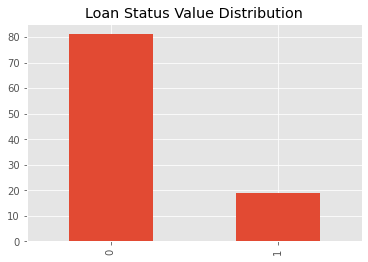

In [60]:
# Plotting histogram to see distribution of data in different categories.
(df["loan_status"].value_counts()*100/(df.shape[0])).plot.bar()
plt.title('Loan Status Value Distribution')
print(df["loan_status"].value_counts()*100/(df.shape[0]))

In [115]:
# Creating data for training the model.
X = df.drop(["loan_status"], axis=1)
y = df["loan_status"]

### Random forest classifier

In [96]:
%%time
%memit

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Instantiate Random Forest with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Model Evaluation
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

%memit

peak memory: 2473.76 MiB, increment: 0.93 MiB
Accuracy: 0.9684584319732628
peak memory: 3619.85 MiB, increment: 0.06 MiB
CPU times: total: 11min 8s
Wall time: 11min 18s


In [97]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("f1_score ->",f1)
print("precision_score ->",precision)
print("recall_score ->",recall,)
print("\n\n")
print("confusion_matrix ->\n",confusion)
print("classification_report ->\n",report)

f1_score -> 0.9097723939377478
precision_score -> 0.9947140226881274
recall_score -> 0.8381962864721485



confusion_matrix ->
 [[255754    267]
 [  9699  50244]]
classification_report ->
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    256021
           1       0.99      0.84      0.91     59943

    accuracy                           0.97    315964
   macro avg       0.98      0.92      0.95    315964
weighted avg       0.97      0.97      0.97    315964



### XG Boost classifier

In [119]:
%%time
%memit

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best params (Parameters we got from hyperparameter tuning using Optuna library)
params = {
    'objective': 'binary:logistic',  # Specify binary classification with logistic loss
    'eval_metric': 'auc',  # Use AUC (Area Under the ROC Curve) for evaluation
    'learning_rate': 0.1815,  # Learning rate, controls step size during optimization
    'n_estimators': 100,  # Number of boosting stages (trees)
    'max_depth': 10,  # Maximum depth of individual trees
    'min_child_weight': 1.95,  # Minimum sum of hessians (second derivative of loss) required in a child node
    'gamma': 0.66,  # Minimum loss reduction required for a split
    'colsample_bytree': 0.82,  # Fraction of features randomly sampled for each tree
    'subsample': 0.98,  # Fraction of training instances randomly sampled for each boosting stage
    'seed': 42  # Random seed for reproducibility
}

# # Define XGBoost parameters
# params = {
#     'objective': 'binary:logistic',  # Specify binary classification with logistic loss
#     'eval_metric': 'auc',  # Use AUC (Area Under the ROC Curve) for evaluation
#     'learning_rate': 0.1,  # Learning rate, controls step size during optimization
#     'n_estimators': 100,  # Number of boosting stages (trees)
#     'max_depth': 10,  # Maximum depth of individual trees
#     'min_child_weight': 1,  # Minimum sum of hessians (second derivative of loss) required in a child node
#     'gamma': 0,  # Minimum loss reduction required for a split
#     'colsample_bytree': 0.8,  # Fraction of features randomly sampled for each tree
#     'subsample': 0.8,  # Fraction of training instances randomly sampled for each boosting stage
#     'seed': 42  # Random seed for reproducibility
# }
# # Results for defined parameters. 
# Accuracy: 0.9841532579660974
# AUC: 0.9600432104005717

# Create an XGBoost classifier instance
model_xgb_class = xgb.XGBClassifier(**params)

# Train the model
model_xgb_class.fit(X_train, y_train)

# Make predictions on new data (X_test)
y_pred = model_xgb_class.predict(X_test)

# Evaluate model performance (using your preferred metrics)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)
%memit

peak memory: 854.43 MiB, increment: 0.02 MiB
Accuracy: 0.9841279386259194
AUC: 0.9605322618080432
peak memory: 1251.17 MiB, increment: 0.00 MiB
CPU times: total: 1min 47s
Wall time: 24 s


In [120]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("f1_score ->",f1)
print("precision_score ->",precision)
print("recall_score ->",recall)
print("confussion_score ->\n",confusion)
print("classification_report ->\n",report)

f1_score -> 0.9566217747446177
precision_score -> 0.9933534526119134
recall_score -> 0.9225097175650201
confussion_score ->
 [[255651    370]
 [  4645  55298]]
classification_report ->
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    256021
           1       0.99      0.92      0.96     59943

    accuracy                           0.98    315964
   macro avg       0.99      0.96      0.97    315964
weighted avg       0.98      0.98      0.98    315964



### XG boost hyperparameter tuning

In [116]:
%%time
%memit

# Importing required library.
import optuna

# Define objective function
def objective(trial):
    # Load dataset
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    params = {
        'objective': 'binary:logistic',
        'seed': 42,
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': 100,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.1),
    }
    

    # Create an XGBoost classifier instance
    model_xgb_class = xgb.XGBClassifier(**params)
    model_xgb_class.fit(X_train, y_train)
    y_pred = model_xgb_class.predict(X_valid)
    auc = roc_auc_score(y_valid, y_pred)
    return 1.0 - auc  # Optuna minimizes the objective function

# Create study
study = optuna.create_study(direction='minimize')

# Optimize
study.optimize(objective, n_trials=100)

# Get best parameters
best_params = study.best_params
%memit

[I 2024-04-15 03:58:29,151] A new study created in memory with name: no-name-68630709-7daa-4dd4-8833-5046269fb3ca


peak memory: 1463.26 MiB, increment: 3.00 MiB


[I 2024-04-15 03:58:41,865] Trial 0 finished with value: 0.05648349033228184 and parameters: {'learning_rate': 0.14597621257589832, 'max_depth': 5, 'min_child_weight': 1.186969934064986, 'subsample': 0.967785942317464, 'colsample_bytree': 0.5517468831849317, 'gamma': 0.021244553898578857}. Best is trial 0 with value: 0.05648349033228184.
[I 2024-04-15 03:59:07,185] Trial 1 finished with value: 0.040965846106537196 and parameters: {'learning_rate': 0.052508463120771884, 'max_depth': 10, 'min_child_weight': 0.31294387770512344, 'subsample': 0.8516569930052545, 'colsample_bytree': 0.9522976678699011, 'gamma': 0.0031222232493831274}. Best is trial 1 with value: 0.040965846106537196.
[I 2024-04-15 03:59:21,295] Trial 2 finished with value: 0.07707997262107502 and parameters: {'learning_rate': 0.07807769355025174, 'max_depth': 4, 'min_child_weight': 1.394332046054535, 'subsample': 0.5291389580154217, 'colsample_bytree': 0.9477081646082839, 'gamma': 0.007007313744017674}. Best is trial 1 with

[I 2024-04-15 04:08:30,437] Trial 24 finished with value: 0.039433349877753376 and parameters: {'learning_rate': 0.17388175824582544, 'max_depth': 10, 'min_child_weight': 0.34469429005277563, 'subsample': 0.6595727451392609, 'colsample_bytree': 0.9285996757314062, 'gamma': 0.07653801126293269}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:08:54,036] Trial 25 finished with value: 0.04032351118609223 and parameters: {'learning_rate': 0.17897822977416422, 'max_depth': 8, 'min_child_weight': 0.35990967371324833, 'subsample': 0.6812146774734192, 'colsample_bytree': 0.8630752016576535, 'gamma': 0.07457803334159453}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:09:23,256] Trial 26 finished with value: 0.03956823356465222 and parameters: {'learning_rate': 0.16851506258523288, 'max_depth': 10, 'min_child_weight': 0.2685400976258374, 'subsample': 0.6743028863845054, 'colsample_bytree': 0.9176601295387197, 'gamma': 0.05734355913399163}. Best is trial 

[I 2024-04-15 04:18:22,343] Trial 48 finished with value: 0.04996652135238244 and parameters: {'learning_rate': 0.1447709439232267, 'max_depth': 5, 'min_child_weight': 1.1101341271012097, 'subsample': 0.7315257031627284, 'colsample_bytree': 0.9601036940801372, 'gamma': 0.024631480063066764}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:18:39,977] Trial 49 finished with value: 0.04914037208734978 and parameters: {'learning_rate': 0.09188650474127424, 'max_depth': 6, 'min_child_weight': 1.8058160375854238, 'subsample': 0.6242117580861739, 'colsample_bytree': 0.9925419474068529, 'gamma': 0.00011362080543583092}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:19:03,988] Trial 50 finished with value: 0.04007767327559142 and parameters: {'learning_rate': 0.12325536309920947, 'max_depth': 9, 'min_child_weight': 0.5992590285510933, 'subsample': 0.8037310950412927, 'colsample_bytree': 0.948318665866298, 'gamma': 0.012202684809987298}. Best is trial 24

[I 2024-04-15 04:28:17,789] Trial 72 finished with value: 0.039596798497065766 and parameters: {'learning_rate': 0.17104594265712303, 'max_depth': 10, 'min_child_weight': 1.3883475358892017, 'subsample': 0.8204328961078626, 'colsample_bytree': 0.9289577671288537, 'gamma': 0.07877715910520966}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:28:43,413] Trial 73 finished with value: 0.039529009640152823 and parameters: {'learning_rate': 0.19562064827506032, 'max_depth': 10, 'min_child_weight': 1.3487047032020003, 'subsample': 0.7416110079788529, 'colsample_bytree': 0.8492121781669247, 'gamma': 0.08643928449483981}. Best is trial 24 with value: 0.039433349877753376.
[I 2024-04-15 04:29:05,663] Trial 74 finished with value: 0.039497032663894815 and parameters: {'learning_rate': 0.19344274462695785, 'max_depth': 9, 'min_child_weight': 1.5356798948593307, 'subsample': 0.7363765149405461, 'colsample_bytree': 0.8577512567367552, 'gamma': 0.08478725119872715}. Best is trial 

[I 2024-04-15 04:38:19,703] Trial 96 finished with value: 0.03939889053835477 and parameters: {'learning_rate': 0.18032842708547017, 'max_depth': 10, 'min_child_weight': 1.9758819448257017, 'subsample': 0.9752417447968721, 'colsample_bytree': 0.8204386075181151, 'gamma': 0.0743025744539143}. Best is trial 95 with value: 0.03933305464623771.
[I 2024-04-15 04:38:43,588] Trial 97 finished with value: 0.039594810019672466 and parameters: {'learning_rate': 0.18072999289892905, 'max_depth': 10, 'min_child_weight': 1.9551141816636541, 'subsample': 0.976609214157742, 'colsample_bytree': 0.8219292192019451, 'gamma': 0.07328730227731321}. Best is trial 95 with value: 0.03933305464623771.
[I 2024-04-15 04:39:04,079] Trial 98 finished with value: 0.043230197313615326 and parameters: {'learning_rate': 0.17152853705901144, 'max_depth': 6, 'min_child_weight': 1.936251311776037, 'subsample': 0.9539918191377408, 'colsample_bytree': 0.7999440984975082, 'gamma': 0.06553026206533147}. Best is trial 95 wit

peak memory: 852.37 MiB, increment: 0.81 MiB
CPU times: total: 3h 43min 51s
Wall time: 41min 11s


#### Best hyperparameters for our XGboost model

In [118]:
# I tried using the best_params which only gives a slightly better results.
best_params

{'learning_rate': 0.18148798713879052,
 'max_depth': 10,
 'min_child_weight': 1.9455416095848024,
 'subsample': 0.9752638805410186,
 'colsample_bytree': 0.8204780595455203,
 'gamma': 0.06602440349007915}

# 4. Explaining dependence of predictions on features
- Calculating SHAP values for each data points. Evaluating average SHAP values for each feature to find feature importance
- Calculating "Correlation" for numerical features with target variable

### SHAP Analysis

In [64]:
# Importing "SHAP" library and initializing JS for plots.
import shap
shap.initjs()

In [65]:
# Get shap values
explainer = shap.Explainer(model_xgb_class)
shap_values = explainer(X_test[1:10000])

In [117]:
# Estimating feature importance.
shap_df = pd.DataFrame(data=shap_values.values, columns=X_test.columns)
# Taking mean of SHAP values for each column.
shap_df_summary = shap_df.abs().mean()
feature_imp = shap_df_summary.sort_values(ascending=False)
feature_imp

total_pymnt                    2.399832
loan_amnt                      2.295479
term                           0.392160
total_rec_late_fee             0.308844
mths_since_rcnt_il             0.269486
fico_avg                       0.206352
total_bc_revol_util            0.152132
dti                            0.149421
total_bc_revol_limit           0.141306
initial_list_status            0.092826
tot_cur_bal                    0.090199
total_num_bc_revol             0.086569
num_il_tl                      0.084211
annual_inc                     0.084058
acc_open_past_24mths           0.068783
verification_status            0.068270
purpose                        0.051769
inq_last_6mths                 0.049379
zip_code                       0.048788
home_ownership                 0.047546
mort_acc                       0.041761
mths_since_recent_bc           0.038927
mo_sin_old_rev_tl_op           0.035067
mths_since_recent_inq          0.032536
mo_sin_rcnt_tl                 0.028732


					FEATURE IMPORTANCE					


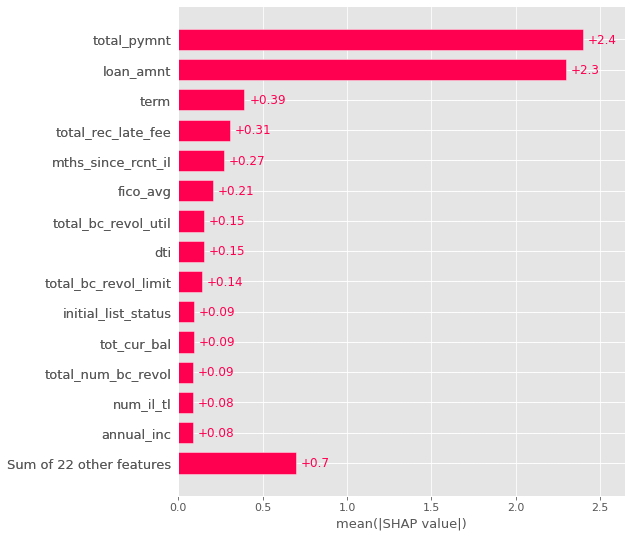

In [67]:
# Generate feature importance plot.
print('\033[1m'+"\t\t\t\t\tFEATURE IMPORTANCE\t\t\t\t\t"+'\033[1m')
shap.plots.bar(shap_values, max_display=15)

					 SUMMARY					


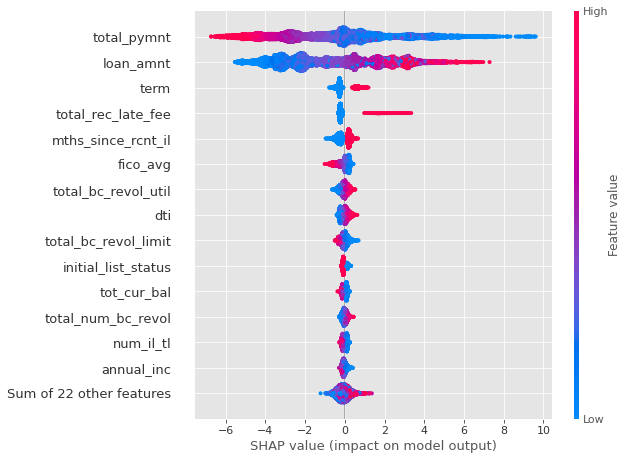

In [68]:
# Generate summary plot.
print('\033[1m'+"\t\t\t\t\t SUMMARY\t\t\t\t\t"+'\033[1m')
shap.plots.beeswarm(shap_values, max_display=15)

#### Explaining the results
##### First Plot:
- Shapley value for all features within each observation is computed (represents the measure of importance of that feature in an observation to predict target value)
 1. Mean of absolute value of these individual shapely values for a feature, represents the importance of that features.
 2. loan amount, term, recovered late fee, FICO and debt_to_income ratios are some of the most influencing features.
 
##### Second Plot:
- Colour of points in each cluster represent the value corresponding to that feature in any single observation and value on x-axis how these points impact the target variable.
 1. Points on negative side represent these values will lead to a negative impact (reduction in probability) of Charged Off cases and vise versa.
 2. loan amount, term, recovered late fee, debt_to_income ratios, credit utilization have a positive impact on Charged Off value.
 3. FICO, credit limit have a negative impact on Charged Off value.

### Correlation with target variable

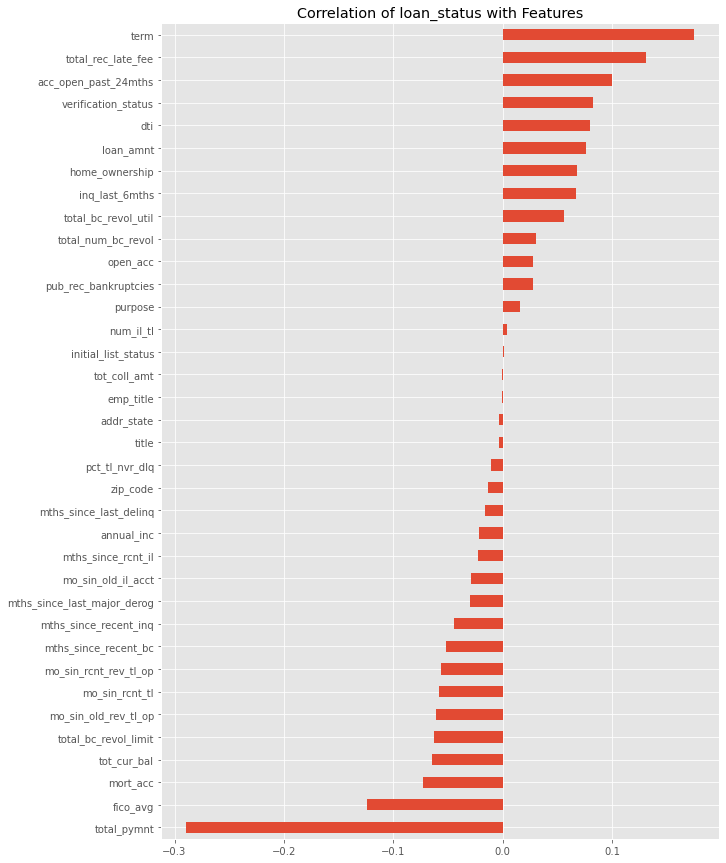

In [90]:
# Removing categorical features.
plt.figure(figsize=(10,15))
corr_series = df.corr()["loan_status"].sort_values()[:-1]
corr_series.plot.barh()
plt.title('Correlation of loan_status with Features');

In [92]:
# Taking top and bottom 10 features based on their correlation with target feature.
top_10 = corr_series.abs().sort_values(ascending=False)[:-1][0:10].index
bottom_10 = corr_series.abs().sort_values(ascending=False)[:-1][-11:-1].index

In [94]:
# Feature importance of features with high correlation with target variables.
imp_top_10 = feature_imp[top_10].abs()
print("Mean Shapley value for TOP 10 highly correlated features ->", imp_top_10.mean())
imp_top_10

Mean Shapley value for TOP 10 highly correlated features -> 0.5978447198867798


total_pymnt             2.399832
term                    0.392160
total_rec_late_fee      0.308844
fico_avg                0.206352
acc_open_past_24mths    0.068783
verification_status     0.068270
dti                     0.149421
loan_amnt               2.295479
mort_acc                0.041761
home_ownership          0.047546
dtype: float32

In [95]:
# Feature importance of features with high correlation with target variables.
imp_bottom_10 = feature_imp[bottom_10].abs()
print("Mean Shapley value for BOTTOM 10 highly correlated features ->", imp_bottom_10.mean())
imp_bottom_10

Mean Shapley value for BOTTOM 10 highly correlated features -> 0.07023225724697113


mths_since_rcnt_il        0.269486
annual_inc                0.084058
mths_since_last_delinq    0.021415
purpose                   0.051769
zip_code                  0.048788
pct_tl_nvr_dlq            0.009603
num_il_tl                 0.084211
title                     0.025641
addr_state                0.014526
initial_list_status       0.092826
dtype: float32

#### Observation: For our dataset, we observe that features with high correlatoin with target variable have higher average feature importance as compare to the features with low correlation with target variable, which is in line with intution. 